In [1]:
#import libraries 
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

#import data file
data = pd.read_csv("final_datafile.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472179 entries, 0 to 472178
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   object_id    472179 non-null  float64
 1   line_number  472179 non-null  object 
 2   description  472179 non-null  object 
 3   value        472179 non-null  float64
 4   perc_cost    469864 non-null  float64
 5   name         472179 non-null  object 
 6   year         472179 non-null  int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 25.2+ MB


In [2]:
#check to ensure all data files are included
data['object_id'].nunique()

23802

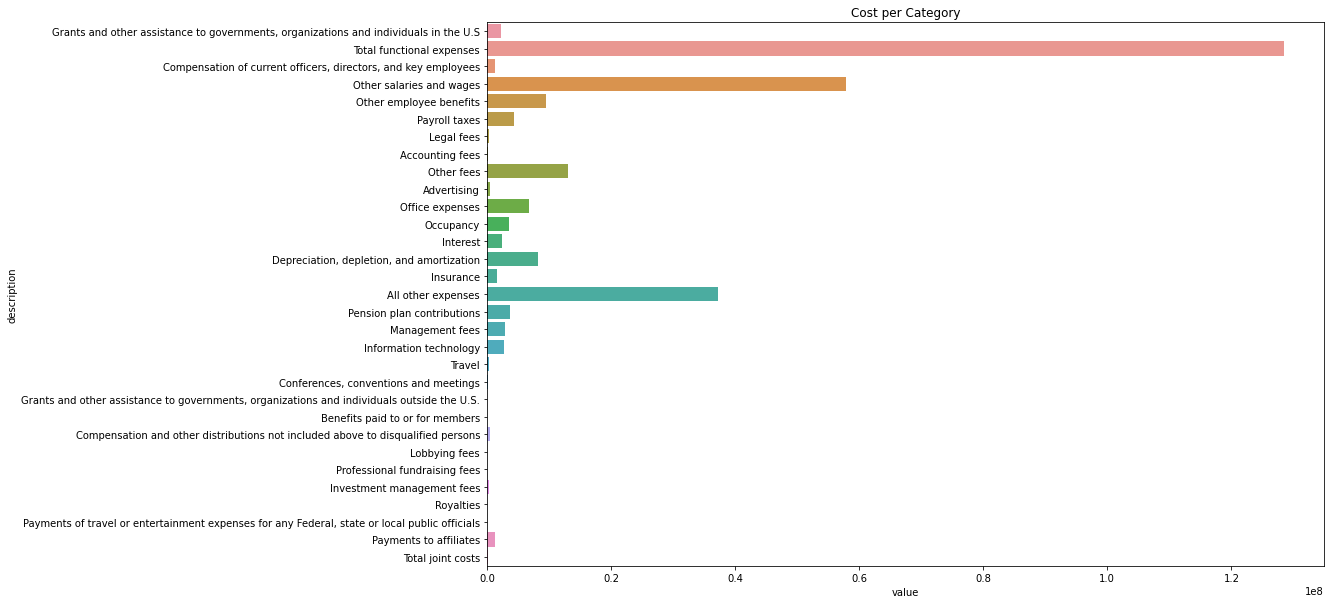

In [3]:
#plot cost per Description
plt.figure(figsize=(15,10))
plt.title("Cost per Category")
CostperCtg = sns.barplot(data=data, y='description', x='value', ci=None)


In [4]:
# Fill NA of per_cost with zero
data['perc_cost'].fillna(0, inplace = True)

# This hospital had a legal fees of 92187.0 and 41928.0 with All other expenses of -134115.0, 
# resulting in a Total functional cost of zero. Hence, when calculating percentage they gave inf/-inf values. 
# I decided to drop this entry as all other categoeries had zero values, and the inf was interfeing with the mean analysis.  
data.drop(data[data['name'] == 'COMMUNITY GENERAL HOSPITAL OF GREATER'].index, inplace=True)


<AxesSubplot:title={'center':'Cost per Category'}, xlabel='value', ylabel='description'>

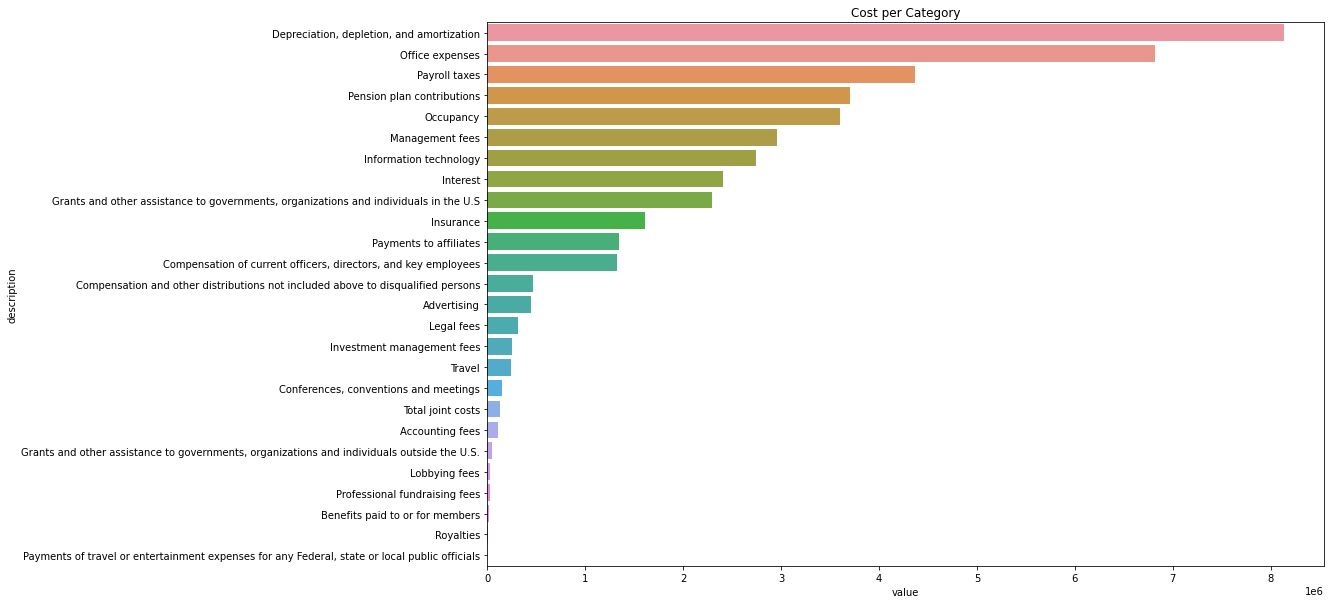

In [5]:
#As seen in the plot above, I dropped the major contributes to dataset in order to see the cost distribution of the categories.
df = data.drop(data[data['description']=='Total functional expenses'].index)
df = df.drop(df[df['description']=='Other salaries and wages'].index)
df = df.drop(df[df['description']=='Other employee benefits'].index)
df = df.drop(df[df['description']=='All other expenses'].index)
df = df.drop(df[df['description']=='Other fees'].index)

#plot data
plt.figure(figsize=(15,10))
plt.title("Cost per Category")
order_val = df.groupby(["description"])["value"].mean().sort_values(ascending=False).index
sns.barplot(data=df, y='description', x='value', ci=None, order=order_val)


[Text(0, 0, '25.41%'),
 Text(0, 0, '4.78%'),
 Text(0, 0, '4.00%'),
 Text(0, 0, '3.70%'),
 Text(0, 0, '3.19%'),
 Text(0, 0, '2.69%'),
 Text(0, 0, '1.90%'),
 Text(0, 0, '1.83%'),
 Text(0, 0, '1.51%'),
 Text(0, 0, '1.46%'),
 Text(0, 0, '1.46%'),
 Text(0, 0, '1.42%'),
 Text(0, 0, '1.28%'),
 Text(0, 0, '1.28%'),
 Text(0, 0, '1.14%'),
 Text(0, 0, '1.03%'),
 Text(0, 0, '0.74%'),
 Text(0, 0, '0.65%'),
 Text(0, 0, '0.65%'),
 Text(0, 0, '0.58%'),
 Text(0, 0, '0.56%'),
 Text(0, 0, '0.40%'),
 Text(0, 0, '0.28%'),
 Text(0, 0, '0.03%'),
 Text(0, 0, '0.01%'),
 Text(0, 0, '0.00%')]

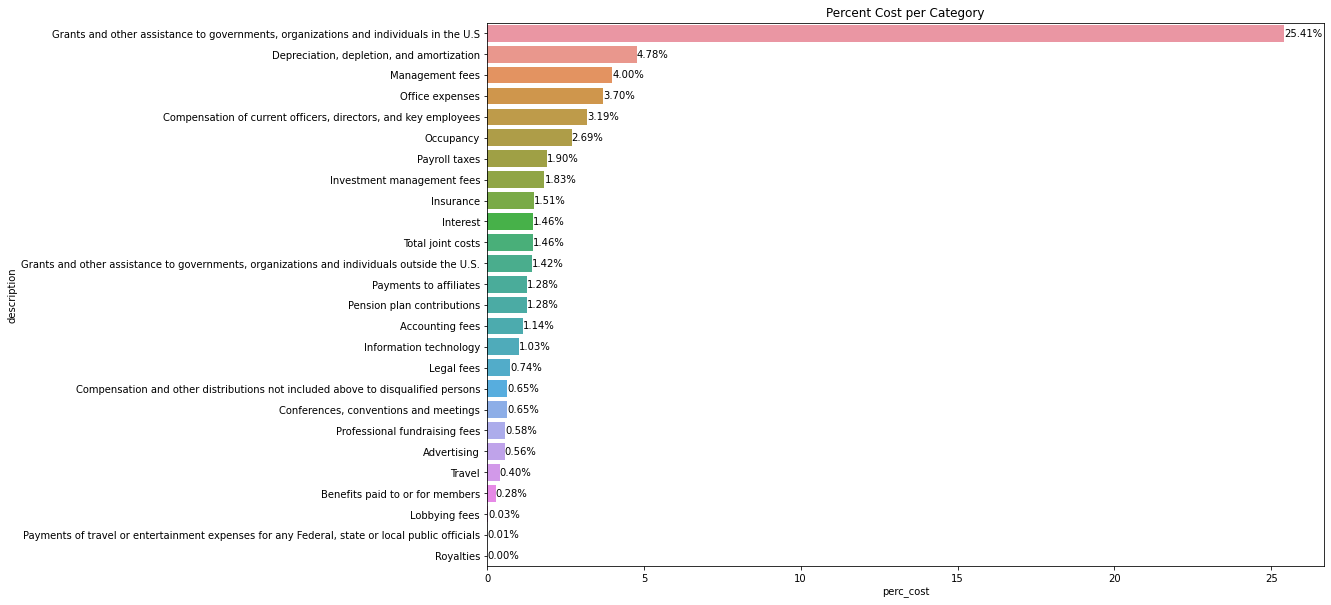

In [6]:
#plot precent cost per category
plt.figure(figsize=(15,10))
plt.title("Percent Cost per Category")
order_perc = df.groupby(["description"])["perc_cost"].mean().sort_values(ascending=False).index
CpC_perc = sns.barplot(data=df, y='description', x='perc_cost', ci=None, order=order_perc)
CpC_perc.bar_label(CpC_perc.containers[0], fmt='%.2f%%')


[Text(0, 0, '0.86%'),
 Text(0, 0, '0.94%'),
 Text(0, 0, '0.92%'),
 Text(0, 0, '1.02%'),
 Text(0, 0, '1.05%'),
 Text(0, 0, '1.07%'),
 Text(0, 0, '1.06%'),
 Text(0, 0, '1.06%'),
 Text(0, 0, '1.07%'),
 Text(0, 0, '1.11%'),
 Text(0, 0, '1.06%')]

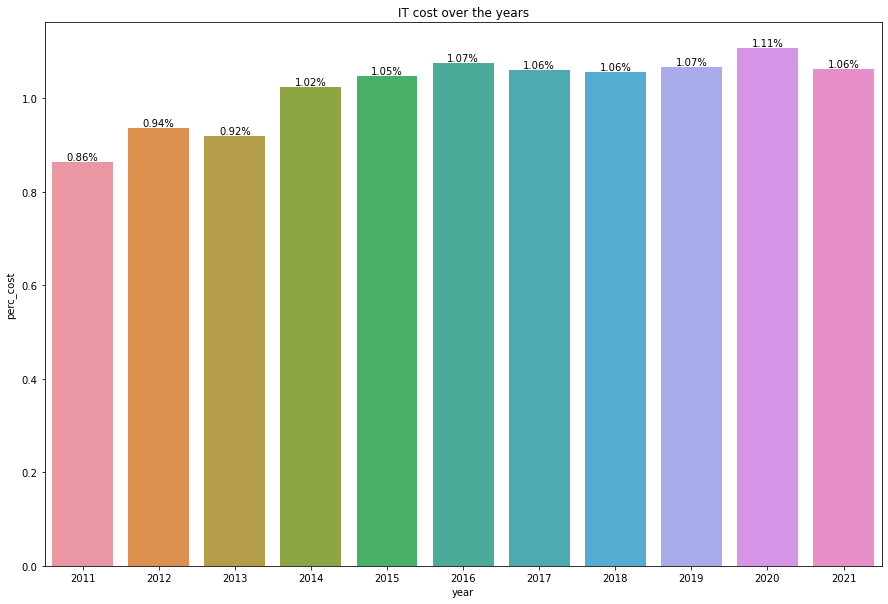

In [8]:
#looking at IT Cost only
ITonly = df[df['description']=='Information technology']

#plot IT cost by year
plt.figure(figsize=(15,10))
plt.title("IT cost over the years")
IT_year = sns.barplot(data=ITonly, x='year', y='perc_cost', ci=None)
IT_year.bar_label(IT_year.containers[0], fmt='%.2f%%')


[Text(0, 0, '33.78%'),
 Text(0, 0, '22.32%'),
 Text(0, 0, '19.34%'),
 Text(0, 0, '18.92%'),
 Text(0, 0, '17.31%'),
 Text(0, 0, '15.03%'),
 Text(0, 0, '13.41%'),
 Text(0, 0, '12.66%'),
 Text(0, 0, '12.44%'),
 Text(0, 0, '10.66%')]

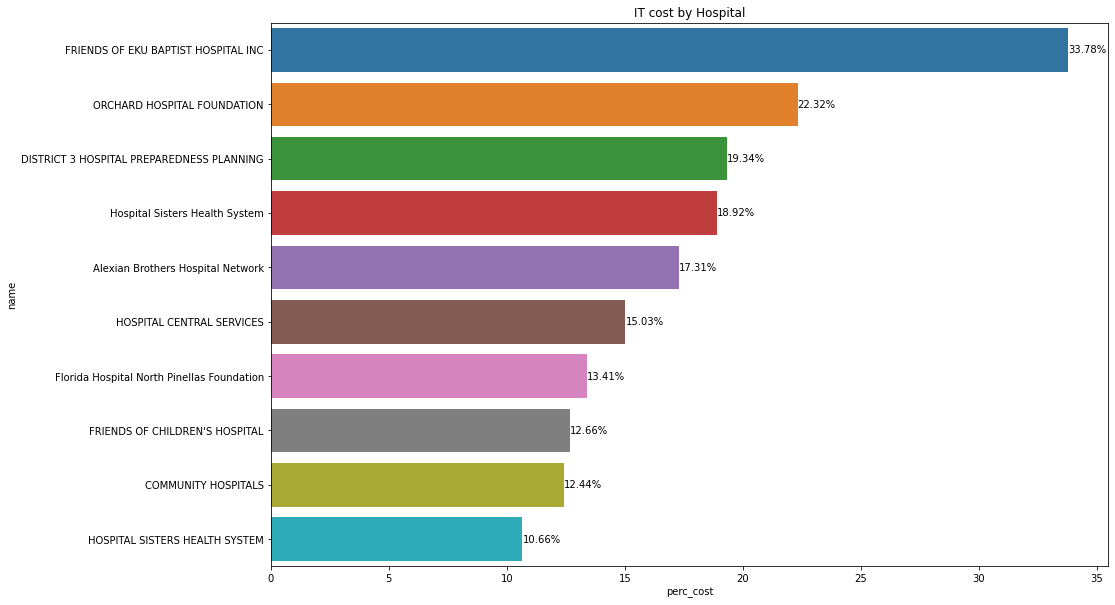

In [9]:
# plotting the top 10 hospitals with the greatest IT cost
plt.figure(figsize=(15,10))
plt.title("IT cost by Hospital")
order_hos = ITonly.groupby(["name"])["perc_cost"].mean().sort_values(ascending=False).iloc[:10].index
IT_hos = sns.barplot(data=ITonly, y='name', x='perc_cost', ci=None, order=order_hos)
IT_hos.bar_label(IT_hos.containers[0], fmt='%.2f%%')


[Text(0, 0, '1,875,179'),
 Text(0, 0, '1,907,048'),
 Text(0, 0, '1,933,967'),
 Text(0, 0, '2,075,818'),
 Text(0, 0, '2,163,149'),
 Text(0, 0, '2,578,613'),
 Text(0, 0, '3,070,589'),
 Text(0, 0, '3,285,549'),
 Text(0, 0, '4,138,721'),
 Text(0, 0, '3,874,848'),
 Text(0, 0, '2,585,775')]

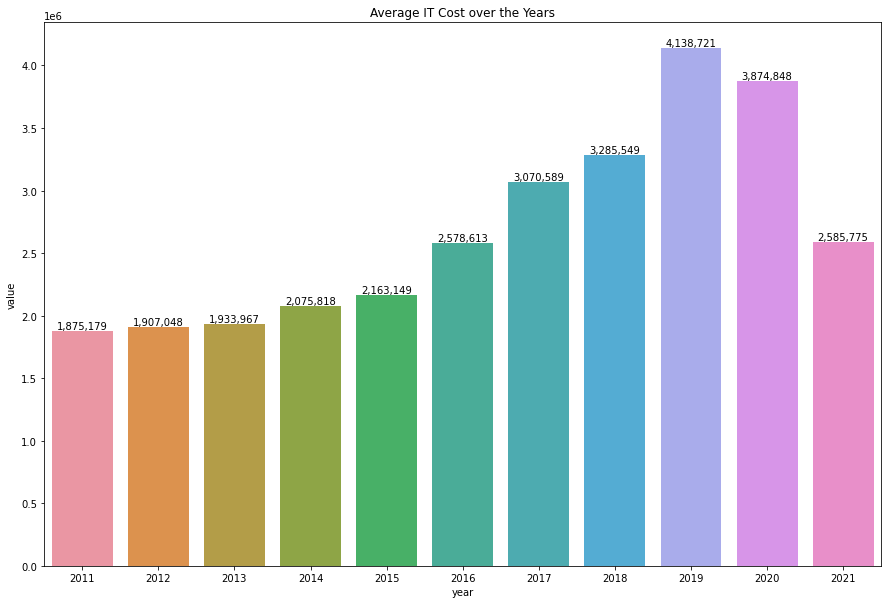

In [10]:
#plot IT value by year
plt.figure(figsize=(15,10))
plt.title("Average IT Cost over the Years")
IT_year = sns.barplot(data=ITonly, x='year', y='value', ci=None)
#format bar labels
container = IT_year.containers[0]
IT_year.bar_label(container, labels=[f'{x:,.0f}' for x in container.datavalues])

[Text(0, 0, '13,044,053'),
 Text(0, 0, '12,460,494'),
 Text(0, 0, '12,394,168'),
 Text(0, 0, '11,977,581'),
 Text(0, 0, '13,069,273'),
 Text(0, 0, '13,018,027'),
 Text(0, 0, '13,825,014'),
 Text(0, 0, '14,506,360'),
 Text(0, 0, '16,290,036'),
 Text(0, 0, '16,453,062'),
 Text(0, 0, '13,129,335')]

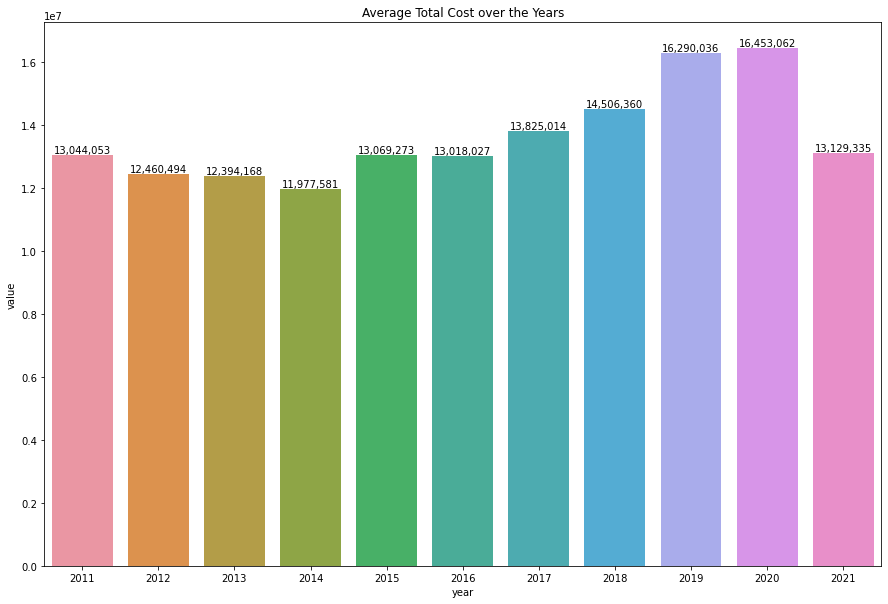

In [11]:
#plot Cost value by year
plt.figure(figsize=(15,10))
plt.title("Average Total Cost over the Years")
data_year = sns.barplot(data=data, x='year', y='value', ci=None)
#format bar labels
container = data_year.containers[0]
data_year.bar_label(container, labels=[f'{x:,.0f}' for x in container.datavalues])


[Text(0, 0, '120,613,163'),
 Text(0, 0, '119,437,880'),
 Text(0, 0, '120,580,531'),
 Text(0, 0, '114,839,878'),
 Text(0, 0, '124,254,105'),
 Text(0, 0, '121,517,216'),
 Text(0, 0, '128,405,914'),
 Text(0, 0, '133,685,570'),
 Text(0, 0, '149,316,345'),
 Text(0, 0, '149,698,065'),
 Text(0, 0, '122,439,300')]

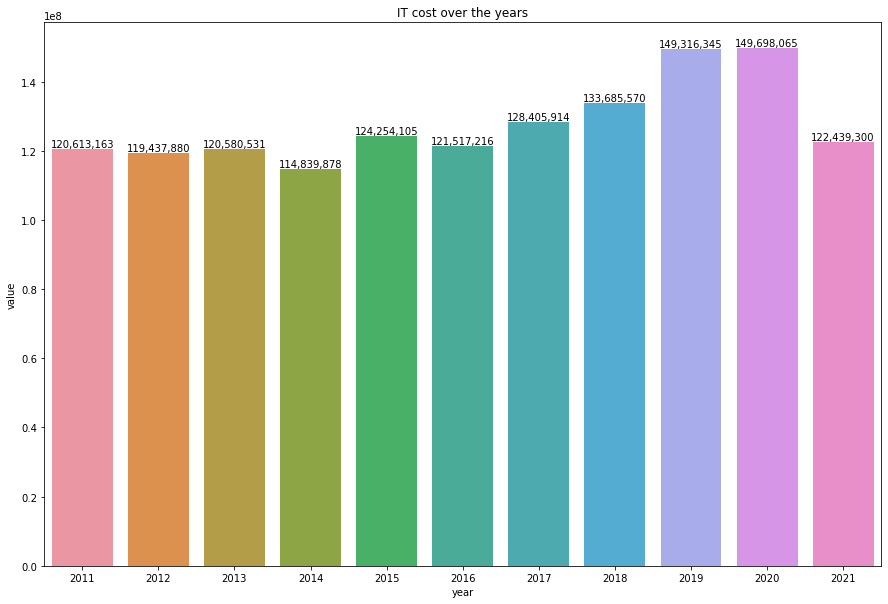

In [22]:
#looking at IT Cost only
df_Tcost = data.drop(data[data['description']=='Total functional expenses'].index)
total_cost = data[data['description']=='Total functional expenses']

#plot IT cost by year
plt.figure(figsize=(15,10))
plt.title("IT cost over the years")
TCost_plot = sns.barplot(data=total_cost, x='year', y='value', ci=None)
container = TCost_plot.containers[0]
TCost_plot.bar_label(container, labels=[f'{x:,.0f}' for x in container.datavalues])


In [15]:
total_cost

,object_id,line_number,description,value,perc_cost,name,year


In [25]:
ITonly.groupby(["year"])["value"].mean()

year
2011    1.875179e+06
2012    1.907048e+06
2013    1.933967e+06
2014    2.075818e+06
2015    2.163149e+06
2016    2.578613e+06
2017    3.070589e+06
2018    3.285549e+06
2019    4.138721e+06
2020    3.874848e+06
2021    2.585775e+06
Name: value, dtype: float64

In [51]:
test = ITonly.groupby(["year"])["value"].mean()
df_test = pd.DataFrame(test, columns=['IT', 'TOTAL'])

In [52]:
df_test['IT'] = ITonly.groupby(["year"])["value"].mean()
df_test['TOTAL'] = total_cost.groupby(["year"])["value"].mean()

In [53]:
df_test['perc'] = df_test['IT']/df_test['TOTAL']

In [54]:
df_test.reset_index(inplace=True)

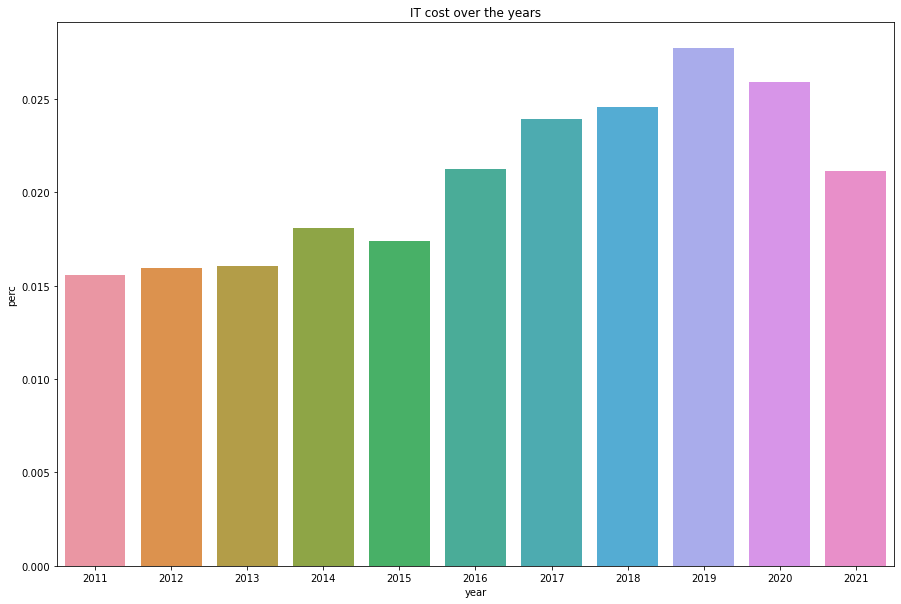

In [56]:
#plot IT cost by year
plt.figure(figsize=(15,10))
plt.title("IT cost over the years")
Tcost_test = sns.barplot(data=df_test, x='year', y='perc', ci=None)
# container = Tcost_test.containers[0]
# Tcost_test.bar_label(container, labels=[f'{x:,.0f}' for x in container.datavalues])


In [55]:
# Totalonly = df[df['description']=='Information technology']

df_test

,year,IT,TOTAL,perc
0,2011,1.875179e+06,1.206132e+08,0.015547
1,2012,1.907048e+06,1.194379e+08,0.015967
2,2013,1.933967e+06,1.205805e+08,0.016039
3,2014,2.075818e+06,1.148399e+08,0.018076
4,2015,2.163149e+06,1.242541e+08,0.017409
5,2016,2.578613e+06,1.215172e+08,0.021220
6,2017,3.070589e+06,1.284059e+08,0.023913
7,2018,3.285549e+06,1.336856e+08,0.024577
8,2019,4.138721e+06,1.493163e+08,0.027718
9,2020,3.874848e+06,1.496981e+08,0.025884
